In [2]:
import os
os.chdir('../')
import sys
sys.path.append("./subjects/")

Each columns's correlation with sex: [ 0.08762275 -0.06577704  0.02684032  0.03427509 -0.38004329 -0.07031842
 -0.16973733 -0.11736268  1.          0.04824349  0.04541514  0.22930915
  0.01338402]


Text(0, 0.5, 'Correlation')

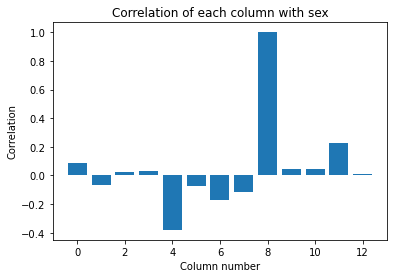

In [5]:
model = "LR" # Does not change the data at all
dataset = "census"
sensitive_name = "sex"

if dataset == "census" and (sensitive_name == "sex" or sensitive_name == "gender"):
    sensitive_param = 9
    group_0 = 0  #female
    group_1 = 1  #male
if dataset == "census" and sensitive_name == "race":
    sensitive_param = 8
    group_0 = 0 # white
    group_1 = 4 # black
if dataset == "credit" and (sensitive_name == "sex" or sensitive_name == "gender"):
    sensitive_param = 9
    group_0 = 0  # male
    group_1 = 1  # female
if dataset == "bank" and sensitive_name == "age":  # with 3,5: 0.89; with 2,5: 0.84; with 4,5: 0.05; with 3,4: 0.6
    group_0 = 3
    group_1 = 5
    sensitive_param = 1
if dataset == "compas" and (sensitive_name == "sex" or sensitive_name == "gender"):  # sex
    group_0 = 0 # male
    group_1 = 1 # female
    sensitive_param = 1
if dataset == "compas" and sensitive_name == "age":  # age
    group_0 = 0 # under 25
    group_1 = 2 # greater than 45
    sensitive_param = 2
if dataset == "compas" and sensitive_name == "race":  # race
    group_0 = 0 # non-Caucasian
    group_1 = 1 # Caucasian
    sensitive_param = 3



from sklearn.covariance import EmpiricalCovariance
import sklearn.decomposition
import ast
import sys
import numpy as np
import os
from sklearn.model_selection import train_test_split
import LogisticRegression
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from adf_data.census import census_data
from adf_data.credit import credit_data
from adf_data.bank import bank_data
from adf_data.compas import compas_data
import pandas as pd
from matplotlib.pyplot import scatter
import matplotlib.pyplot as plt
df = pd.read_csv("./Dataset" + "/" + f"{model}_{dataset}_{sensitive_name}_x100.csv")
inp = ast.literal_eval(df[df['AOD'] == df['AOD'].min()].iloc[0]["inp"])
data = {"census":census_data, "credit":credit_data, "bank":bank_data, "compas": compas_data}

X, Y, input_shape, nb_classes = data[dataset]()
X_transformed = StandardScaler().fit_transform(X) # This turns the "covariance" into correlation
Y = np.argmax(Y, axis=1)
cov = EmpiricalCovariance().fit(X_transformed)
print(f"Each columns's correlation with {sensitive_name}: {cov.covariance_[sensitive_param-1]}")

bars = plt.bar(range(len(cov.covariance_[sensitive_param-1])),cov.covariance_[sensitive_param-1])
plt.title(f"Correlation of each column with {sensitive_name}")
plt.xlabel(f"Column number")
plt.ylabel(f"Correlation")